In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import event_detector_pipeline as edp

hydrophone_metadata = {
    'h1':{
        # start and end identifies the start time of the swarm where the amplitude magnitude is the highest
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
       # obspy_idx is the index within the stream for this data (all data is sorted from top to bottom of the borehole this way in lists)
        ,'obspy_idx':0
        # depth of the hydrophone
        ,'depth':30
        ,'velocity_model':1750
    }
    ,    'h2':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':1
        ,'depth':100        
        ,'velocity_model':1750

    }
    ,    'h3':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':2
        ,'depth':170        
        ,'velocity_model':1750

    }
    ,'h4':{
        'start':obspy.UTCDateTime('2019-05-21T07:48:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:07:00Z')
        ,'obspy_idx':3
        ,'depth':240
        ,'velocity_model':1750
    }
    ,'h5':{
        'start':obspy.UTCDateTime('2019-05-21T08:07:00Z')
        # ,'end':obspy.UTCDateTime('2019-5-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
        ,'obspy_idx':4
        ,'depth':310
        ,'velocity_model':1750
    }
    ,'h6':{
        'start':obspy.UTCDateTime('2019-05-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
       ,'obspy_idx':5
        ,'depth':380
        ,'velocity_model':1750
    }
}

In [2]:
# df = pd.read_csv('hmmm.csv')
df = pd.read_csv('precision.csv')

In [3]:
df

,Unnamed: 0,id,depth,aic_t,aics,aic_maxes,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt
0,0,0,418.500,"[18037.31817321759, 18037.3181718287, 18037.31...","[array([-11818.91953227, -11897.3554506 , -119...","[158, 38, 180, 225, 157, 73]",5,4,18037.318172,2019-05-21 07:38:10.081000+00:00,2019-05-21 07:38:10.165000+00:00,-0.084
1,1,1,345.000,"[18037.318188935187, 18037.318188599536, 18037...","[array([-11346.52726224, -11411.86588148, -114...","[198, 169, 198, 239, 77, 77]",4,5,18037.318188,2019-05-21 07:38:11.403000+00:00,2019-05-21 07:38:11.403000+00:00,0.000
2,2,2,345.000,"[18037.31820296296, 18037.318202974537, 18037....","[array([-11737.2475554 , -11802.46226655, -118...","[182, 183, 182, 227, 49, 49]",4,5,18037.318201,2019-05-21 07:38:12.603000+00:00,2019-05-21 07:38:12.603000+00:00,0.000
3,3,3,345.000,"[18037.3182190625, 18037.31821888889, 18037.31...","[array([-11913.51760689, -12003.97855731, -120...","[186, 171, 184, 224, 32, 32]",4,5,18037.318217,2019-05-21 07:38:13.973000+00:00,2019-05-21 07:38:13.973000+00:00,0.000
4,4,4,345.000,"[18037.31822136574, 18037.318221331017, 18037....","[array([-11616.26915278, -11697.80976516, -117...","[121, 118, 116, 109, 48, 48]",4,5,18037.318221,2019-05-21 07:38:14.253000+00:00,2019-05-21 07:38:14.253000+00:00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2236,2236,2236,380.875,"[18037.359563506947, 18037.35956349537, 18037....","[array([ -8390.57978124, -8482.4006808 , -84...","[196, 195, 344, 276, 237, 196]",5,4,18037.359564,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.328000+00:00,-0.041
2237,2237,2237,380.000,"[18037.35957045139, 18037.35957045139, 18037.3...","[array([ -9400.6431487 , -9478.66260044, -95...","[196, 196, 343, 277, 236, 196]",5,4,18037.359570,2019-05-21 08:37:46.887000+00:00,2019-05-21 08:37:46.927000+00:00,-0.040
2238,2238,2238,380.000,"[18037.359578136577, 18037.359578252315, 18037...","[array([-11623.06758949, -11689.29486604, -116...","[187, 197, 341, 275, 234, 194]",5,4,18037.359578,2019-05-21 08:37:47.558000+00:00,2019-05-21 08:37:47.598000+00:00,-0.040
2239,2239,2239,379.125,"[18037.35958925926, 18037.35958923611, 18037.3...","[array([ -9139.83532459, -9207.91714552, -92...","[199, 197, 345, 277, 238, 199]",5,4,18037.359589,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.551000+00:00,-0.039


In [4]:
import matplotlib.dates as dates
print(dates.num2date(18037.346769))

2019-05-21 08:19:20.841600+00:00


In [5]:
df.sort_values(by='first_arrival', inplace=True)

In [6]:
from ast import literal_eval

df['aic_t'] = df.aic_t.apply(literal_eval)

In [7]:
(sorted([dates.num2date(t) for t in df.iloc[126].aic_t])[2] - sorted([dates.num2date(t) for t in df.iloc[126].aic_t])[3]).total_seconds()

-0.036

In [8]:
df.iloc[126]

Unnamed: 0                                                         126
id                                                                 126
depth                                                            173.5
aic_t                [18037.3200565625, 18037.3200565625, 18037.320...
aics                 [array([-10990.60305658, -11060.42653897, -110...
aic_maxes                               [199, 199, 199, 235, 276, 341]
first_hydrophone                                                     2
second_hydrophone                                                    3
arrival_time                                              18037.320057
first_arrival                         2019-05-21 07:40:52.887000+00:00
second_arrival                        2019-05-21 07:40:52.923000+00:00
dt                                                              -0.036
Name: 126, dtype: object

<AxesSubplot:>

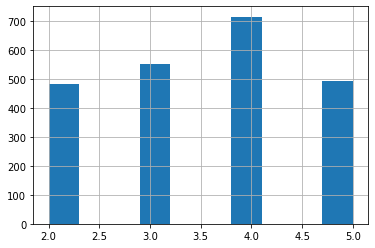

In [9]:
df.first_hydrophone.hist()

In [10]:
35 - 0.5 * (-0.036) * 1750 * (2-3) + 130

133.5

In [11]:
df.iloc[0]['aic_t']

[18037.31817321759,
 18037.3181718287,
 18037.31817347222,
 18037.318173993055,
 18037.31817320602,
 18037.318172233794]

In [12]:
df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)

In [13]:
df.depth.dropna()

0       418.500
1       345.000
2       345.000
3       345.000
4       345.000
         ...   
2236    380.875
2237    380.000
2238    380.000
2239    379.125
2240    377.375
Name: depth, Length: 2241, dtype: float64

<AxesSubplot:>

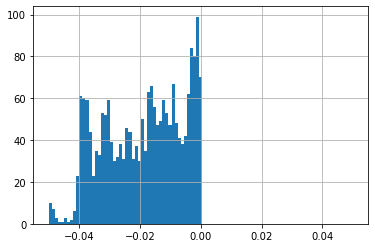

In [14]:
df.apply(lambda row: (dates.num2date(row['aic_t'][row['first_hydrophone']]) - dates.num2date(row['aic_t'][row['second_hydrophone']])).total_seconds(), axis=1).hist(bins=np.linspace(-0.05, 0.05, 100))

(400.0, 50.0)

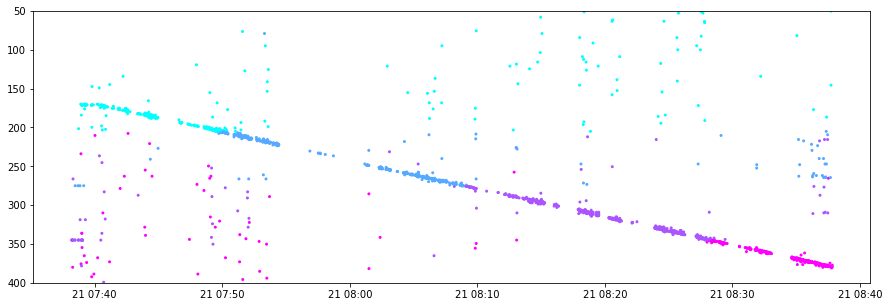

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
# df.set_index('arrival_datetime').depth.plot(ax=ax, linewidth=0, marker='.', color='limegreen')

ax.scatter(df.arrival_datetime, df.depth, marker='.', linewidth=0, c=df.first_hydrophone, cmap='cool')

ax.set_ylim(400, 50)

In [16]:
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
waveforms = load.import_corrected_data_for_single_day(paths=paths)
swarm_starttime = obspy.UTCDateTime('2019-05-21T07:30:00')
swarm_endtime = obspy.UTCDateTime('2019-05-21T08:38:30')
waveforms = waveforms.trim(starttime=swarm_starttime, endtime=swarm_endtime)

In [17]:
waveforms

6 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.02.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.03.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.04.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.05.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.06.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples

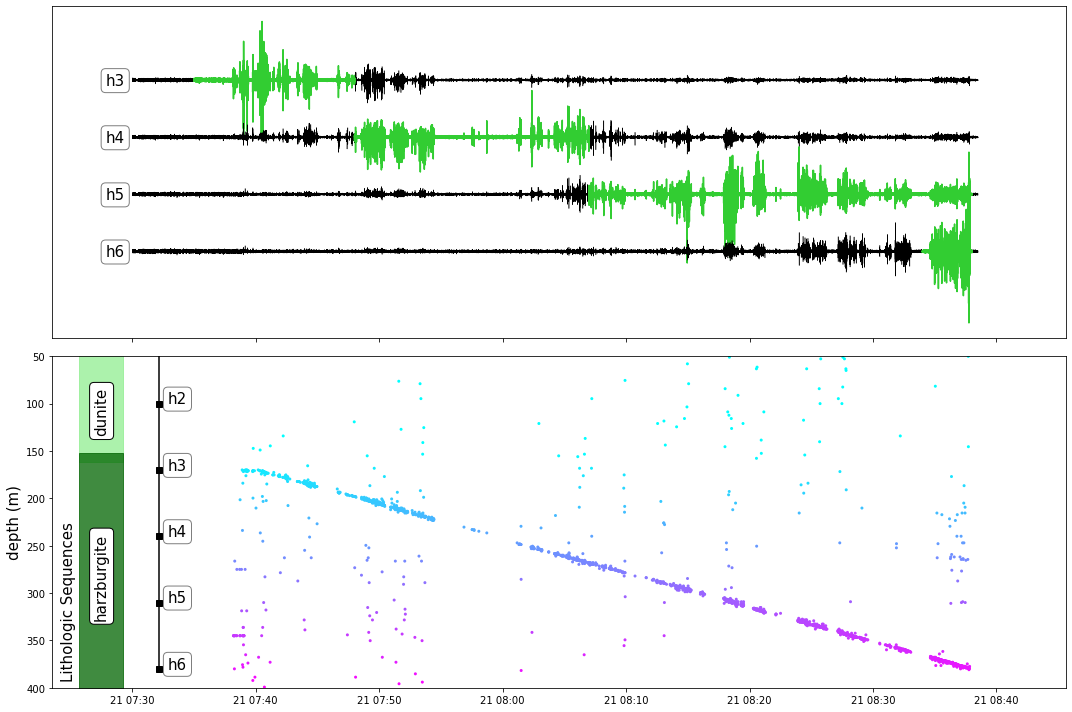

In [18]:
fig, (ax, ax2)= plt.subplots(2, 1, figsize=(15, 10), sharex=True)


ax.set_xlim(18037.308, 18037.365)

metadata = pd.DataFrame(hydrophone_metadata).transpose()
depths = metadata.depth.values
hydrophones = metadata.index

# plot text labeling traces
for hphone, offset in zip(hydrophones, (0, 0, 0, 10, 20, 30)):
    if hphone in ('h1', 'h2'):
        pass
    else:
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        ax.text(s=hphone, x=18037.311, y=-offset-1, fontsize=15, bbox=props)

# plot hydrophone diagram
for d, hphone in zip(depths, hydrophones):
    if hphone == 'h1':
        pass
    else:
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        ax2.text(s=hphone, x=18037.3145, y=d, fontsize=15, bbox=props)
        
ax2.plot((18037.314,)*depths.shape[0], depths, color='black', marker='s')

# depths taken from odp drilling report page 5 lithologic sequences
ax2.fill_between(x=(18037.3095, 18037.312), y1=0.7, y2=161.87, color='lightgreen', alpha=0.75)
ax2.fill_between(x=(18037.3095, 18037.312), y1=151.87, y2=401.94, color='darkgreen', alpha=0.75)

props = dict(boxstyle='round', facecolor='white', alpha=1)
ax2.text(s='dunite', x=18037.31035, y=130, bbox=props, rotation='vertical', fontsize=15)
ax2.text(s='harzburgite', x=18037.31035, y=325, bbox=props, rotation='vertical', fontsize=15)
ax2.text(s='Lithologic Sequences', x=18037.3085, y=390, rotation='vertical', fontsize=15)


ax2.set_ylim(400, 50)
ax2.set_ylabel('depth (m)', fontsize=15)


ax.xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))
ax.set_yticks([])

def plot_with_selection(data, starttime, endtime, offset=0):
    t = data.times('matplotlib')
    d = data.data - offset
    ax.plot(t, d, color='black', linewidth=0.5)
    t_sel = data.slice(starttime=starttime, endtime=endtime).times('matplotlib')
    d_sel = data.slice(starttime=starttime, endtime=endtime).data - offset
    ax.plot(t_sel, d_sel, color='limegreen')
    
plot_with_selection(data=waveforms[2].copy(), starttime=hydrophone_metadata['h3']['start'], endtime=hydrophone_metadata['h3']['end'])
plot_with_selection(data=waveforms[3].copy(), starttime=hydrophone_metadata['h4']['start'], endtime=hydrophone_metadata['h4']['end'], offset=10)
plot_with_selection(data=waveforms[4].copy(), starttime=hydrophone_metadata['h5']['start'], endtime=hydrophone_metadata['h5']['end'], offset=20)
plot_with_selection(data=waveforms[5].copy(), starttime=hydrophone_metadata['h6']['start'], endtime=hydrophone_metadata['h6']['end'], offset=30)

ax2.scatter(df.arrival_datetime, df.depth, marker='.', linewidth=0, c=df.depth, vmin=150, vmax=400, cmap='cool')



fig.tight_layout()
# fig.savefig('plot1.pdf', bbox_inches='tight')

<AxesSubplot:>

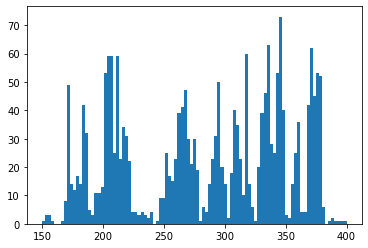

In [39]:
df.depth.hist(bins=np.linspace(150, 400, 100), grid=False)

<AxesSubplot:>

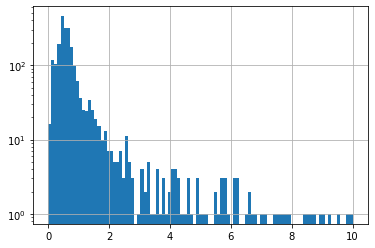

In [56]:
df.first_arrival.apply(pd.to_datetime).diff().apply(lambda t: t.total_seconds()).hist(bins=np.linspace(0, 10, 100), log=True)

In [ ]:
# [(dates.num2date(t) - dates.num2date(t_total[0])).total_seconds() for t in t_total]

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))
# # df.set_index('arrival_datetime').depth.plot(ax=ax, linewidth=0, marker='.', color='limegreen')

# no_bad_picks = df[df.dt.between(-0.05, 0.05)]

# cbar = ax.scatter(no_bad_picks.arrival_datetime, no_bad_picks.depth, marker='.', linewidth=0, c=no_bad_picks.dt, cmap='cool')
# fig.colorbar(cbar)

# import scipy.stats as stats

# lr = stats.linregress(x=no_bad_picks.arrival_time, y=no_bad_picks.depth)
# print(lr)
# x = np.linspace(df.arrival_time.min(), df.arrival_time.max(), 1000)
# y = lr.slope * x + 150
# # x = np.array([dates.num2date(t) for t in x])

# ax.plot(x, y)

# ax.set_ylim(400, 50)

In [ ]:
# np.argsort(df.aic_t[251])

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))

# ax.set_ylabel('depth (m)', fontsize=15)
# ax.set_xlabel('Time since start (s)', fontsize=15)

# data = df[df.depth.between(150, 400)].copy()
# # data = df.copy()#[df.depth.between(150, 350)].copy()
# data['diff'] = data.first_hydrophone - data.second_hydrophone
# data = data[data['diff'].between(-1, 1)].copy()
# data = data[50:]

# x = data.first_arrival.astype('datetime64').reset_index().first_arrival
# t_total = []
# # for t in x:
# #     for t2 in x[1:]:
# #         print((t2 - t).total_seconds())
# #         t_total.append((t2 -t).total_seconds())
# for n, t in enumerate(x[1:]):
#     n += 1
#     t_total.append((t - x[n-1]).total_seconds())
    
# t_total = np.array(t_total)
# t_total = t_total.cumsum()

# # y = data.depth
# yz = data.depth

# # ax.plot(t_total, y[:-1], marker='.', linewidth=0, color='limegreen')

# colors = {-3:'red', -2:'yellow', -1:'green',  1:'green',  2:'yellow',  3:'red'}
# clrs = [colors[c] for c in (data.first_hydrophone - data.second_hydrophone).values]

# for t, y, c in zip(t_total, yz[:-1], clrs):
#     ax.plot(t, y, marker='.', linewidth=0, c=c)

# # lr = stats.linregress(t_total, y[:-1])
# lr = stats.linregress(t_total, yz[:-1])
# print(lr)

# xmod = np.linspace(t_total.min()-100, t_total.max()+100, 1000)
# ymod = lr.slope * xmod + lr.intercept

# ax.plot(xmod, ymod, color='red')
# ax.set_ylim(400, 50)

# depths = []
# n = 1
# for k in hydrophone_metadata.keys():
#     d = hydrophone_metadata[k]['depth']
#     depths.append(d)
#     ax.text(s='h{n}'.format(n=n), x=-175, y=d)
#     n += 1
    
# ax.plot((-100,)*len(depths), depths, color='black', marker='s')

# ax.set_xlim(-250, 4200)

In [ ]:
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
waveforms = load.import_corrected_data_for_single_day(paths=paths)
swarm_starttime = obspy.UTCDateTime('2019-05-21T07:30:00')
swarm_endtime = obspy.UTCDateTime('2019-05-21T08:38:30')
waveforms = waveforms.trim(starttime=swarm_starttime, endtime=swarm_endtime)

In [ ]:
# times = []
# datas = []
# for tr in reversed(waveforms):
#     times.append(tr.times())
#     datas.append(tr.data)

In [ ]:
# fig, (ax, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# n=0
# for t, d in zip(times, datas):
#     ax2.plot(t, d+10*n)
#     n+=1

# ax.set_ylabel('depth (m)', fontsize=15)
# ax.set_xlabel('Time since start (s)', fontsize=15)

# data = df[df.depth.between(150, 400)].copy()
# # data['diff'] = data.first_hydrophone - data.second_hydrophone
# # data = data[data['diff'].between(-1, 1)].copy()
# # data = data[50:]

# # calculates event time in seconds from beginning
# t_total = pd.to_datetime(data.first_arrival).apply(obspy.UTCDateTime) - swarm_starttime

# # x = data.first_arrival.astype('datetime64').reset_index().first_arrival
# # t_total = []

# # for n, t in enumerate(x[1:]):
# #     n += 1
# #     t_total.append((t - x[n-1]).total_seconds())
    
# # t_total = np.array(t_total)
# # t_total = t_total.cumsum()

# yz = data.depth

# colors = {-3:'red', -2:'yellow', -1:'green',  1:'green',  2:'yellow',  3:'red'}
# clrs = [colors[c] for c in (data.first_hydrophone - data.second_hydrophone).values]

# for t, y, c in zip(t_total, yz[:-1], clrs):
#     ax.plot(t, y, marker='.', linewidth=0, c=c)

# # plot the best fit line
# # lr = stats.linregress(t_total, yz[:-1])
# # lr = stats.linregress(t_total, yz)
# # print(lr)

# # xmod = np.linspace(t_total.min()-100, t_total.max()+100, 1000)
# # ymod = lr.slope * xmod + lr.intercept

# # ax.plot(xmod, ymod, color='red')
# ax.set_ylim(400, 50)

# # plot the hydrophones on the left
# depths = []
# n = 1
# for k in hydrophone_metadata.keys():
#     d = hydrophone_metadata[k]['depth']
#     depths.append(d)
#     ax.text(s='h{n}'.format(n=n), x=-175, y=d)
#     n += 1
    
# ax.plot((-100,)*len(depths), depths, color='black', marker='s')

# ax.set_xlim(-250, 4200)

# 4110.0 - (swarm_endtime - obspy.UTCDateTime('2019-05-21T08:07:00Z'))